***Carga de las bibliotecas***

In [112]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
warnings.filterwarnings('ignore')

***Carga del dataset***

In [113]:
data=pd.read_csv("/content/drive/MyDrive/ESCOM/8vo Semestre/Data Mining/Extraordinario/segmentation data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


***Visualización del tipo de datos***

In [114]:
data.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

***Tamaño del dataset***

In [115]:
data.shape

(2000, 8)

***Comprobación de datos faltantes***

In [116]:
data.isnull().any()

ID                 False
Sex                False
Marital status     False
Age                False
Education          False
Income             False
Occupation         False
Settlement size    False
dtype: bool

***Total de filas o registros***

In [117]:
data['ID'].unique()
len(data['ID'].unique())

2000

***Visualización de los datos en una tabla de disperisión***

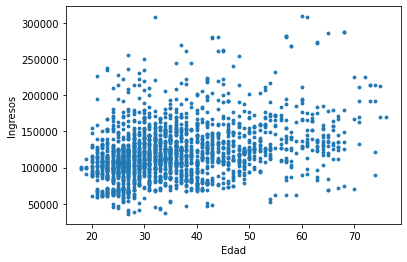

In [118]:
plt.scatter(data['Age'],data['Income'], s=8)
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.show()

***Visualización de la tabla con las variables: Edad e Ingresos***

In [119]:
x=data[['Age','Income']]
x.head()

,Age,Income
0,67,124670
1,22,150773
2,49,89210
3,45,171565
4,53,149031


***Visualización de la gráfica del Método del codo***

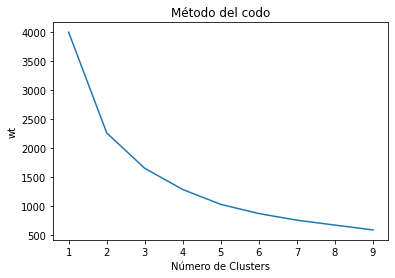

In [120]:
df=data[['Sex','Marital status','Education','Occupation','Settlement size','Age','Income']]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

ms=StandardScaler()
stand=ms.fit_transform(x)
wt=[]
for i in range(1, 10):
    kmeans=KMeans(n_clusters=i,init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(stand)
    wt.append(kmeans.inertia_)
plt.plot(range(1, 10),wt)    
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("wt")
plt.show()

***Configuración del clasificador***

In [121]:
kmeans=KMeans(n_clusters=5,random_state=0)
kmeans.fit(stand)

prediction=kmeans.fit_predict(stand)
prediction

array([2, 0, 4, ..., 3, 3, 3], dtype=int32)

***Agregamos una columna para la predicción del Clustering***

In [122]:
new_data=data.copy()
new_data['cluster']=prediction
new_data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster
0,100000001,0,0,67,2,124670,1,2,2
1,100000002,1,1,22,1,150773,1,2,0
2,100000003,0,0,49,1,89210,0,0,4
3,100000004,0,0,45,1,171565,1,1,2
4,100000005,0,0,53,1,149031,1,1,2


***Visualización del proceso de Agrupamiento***

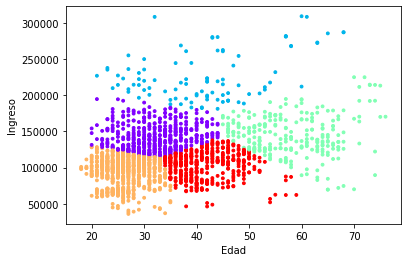

In [123]:
plt.scatter(new_data['Age'],new_data["Income"],c=new_data['cluster'],cmap='rainbow', s=8)
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()

***Agregar las métricas de la silueta***

For n_clusters = 5 
The average silhouette_score is =  0.5401520680025738


Text(0, 0.5, 'Ingreso')

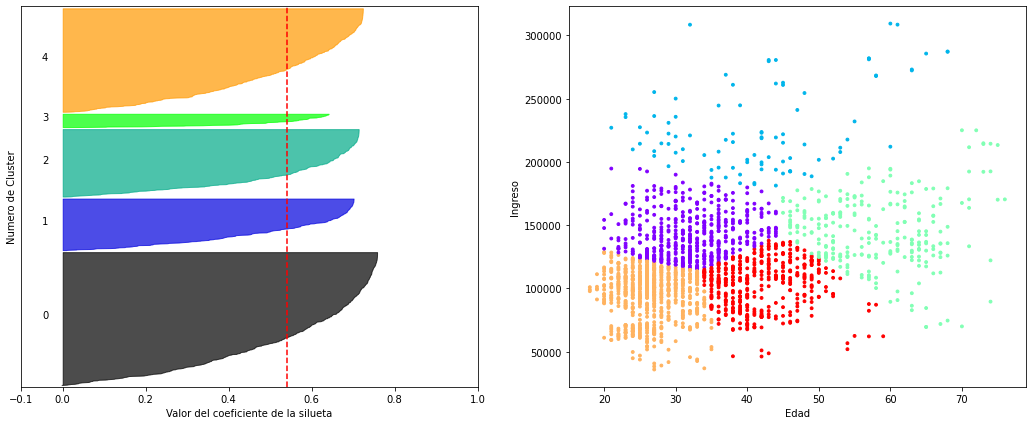

In [124]:
kmeans=KMeans(n_clusters=5, random_state=10)
prediction=kmeans.fit_predict(x)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(x) + (5 + 1) * 10])

silhouette_avg = silhouette_score(x, prediction)
print("For n_clusters = 5 \nThe average silhouette_score is = ",silhouette_avg,)

sample_silhouette_values = silhouette_samples(x, prediction)

y_lower = 10
for i in range(5):
  ith_cluster_silhouette_values = sample_silhouette_values[prediction == i]
  ith_cluster_silhouette_values.sort()
  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.nipy_spectral(float(i) / 5)
  ax1.fill_betweenx(
    np.arange(y_lower, y_upper),
    0,
    ith_cluster_silhouette_values,
    facecolor=color,
    edgecolor=color,
    alpha=0.7,
  )
  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
  y_lower = y_upper + 10

ax1.set_xlabel("Valor del coeficiente de la silueta")
ax1.set_ylabel("Numero de Cluster")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

ax2.scatter(new_data['Age'],new_data["Income"],c=new_data['cluster'],cmap='rainbow', s=8)
ax2.set_xlabel('Edad')
ax2.set_ylabel('Ingreso')

***Análisis estadístico Pseudo-F***

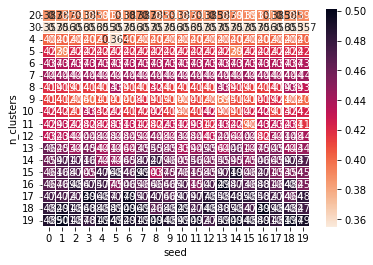

In [125]:
clusters_range=range(2, 20)
random_range  =range(0, 20)
results=[]

for c in clusters_range:
    for r in random_range:
        clusterer=KMeans(n_clusters=c, random_state=r)
        cluster_labels=clusterer.fit_predict(scaled)
        silhouette_avg=silhouette_score(scaled, cluster_labels)
        results.append([c,r,silhouette_avg])

result  =pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km=pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure()
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)